<a href="https://colab.research.google.com/github/sarajay19/Smoked_Vehicles_Detection_Model/blob/main/Smoked_Vehicles_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smoke Detection Model

# Info

Roboflow Link: https://universe.roboflow.com/alpha-ai-nwrrb/smoke-vehicles

### Dataset
Name: smoke vehicles Dataset

Split: Train= 88% / Val= 8% / Test= 4%

### Preprocessing:

Auto-Orient: Applied

Resize: Stretch to 416x416



### Augmentations:

Outputs per training example: 3

Flip: Horizontal, Vertical

Crop: 0% Minimum Zoom, 20% Maximum Zoom

Shear: ±15° Horizontal, ±15° Vertical

Brightness: Between -25% and +25%

Blur: Up to 3.5px

# Code

* `opencv-python`: A popular library for computer vision tasks.
* `ultralytics`: A library for implementing YOLO (You Only Look Once) models for object detection.
* `roboflow`: A platform for managing datasets and model training.
* `tensorflow`: A deep learning framework.
* `squarify`: A library for creating treemaps.

In [ ]:
# Install required libraries
!pip install opencv-python ultralytics
!pip install -q roboflow tensorflow squarify ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.7/872.7 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00


* `os`: For interacting with the operating system, like file paths.
* `shutil`: For high-level file operations.
* `numpy`: For numerical operations and handling arrays.
* `pandas`: For data manipulation and analysis, particularly with DataFrames.
* `matplotlib.pyplot` and `seaborn`: For data visualization.
* `random`: For generating random numbers or select random images.
* `cv2`: OpenCV for image processing.
* `yaml`: For reading YAML files, often used for configuration.
* `Image`: From PIL (Python Imaging Library) for image handling.
* `deque`: A double-ended queue, useful for maintaining a fixed-size list.
* `YOLO`: The YOLO model class for object detection.
* `Video`: For displaying video in Jupyter notebooks.
* `Roboflow`: For accessing datasets and models from the Roboflow platform.
* `ImageDataGenerator`: For augmenting image data during training.
* `tensorflow`: The deep learning framework.
* `mpimg`: For reading images using Matplotlib.
* `squarify`: For creating treemaps.

In [ ]:
# Import various libraries that will be used throughout the notebook
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
from PIL import Image
from collections import deque
from ultralytics import YOLO
from IPython.display import Video
from roboflow import Roboflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.image as mpimg
import squarify
from google.colab.patches import cv2_imshow

* sns.set_style('darkgrid'): Sets the style of seaborn plots to have a dark grid background for better visibility.
* %matplotlib inline: A magic command to display Matplotlib plots inline within a Jupyter notebook.

In [ ]:
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
# import suppresses warnings related to deprecated features, making the output cleaner
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

Loads a pre-trained YOLO model (version 8) from a specified file. This model can detect objects in images.

In [ ]:
# load the pre-trained YOLO model
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 148MB/s]


Connects to the Roboflow API using an API key, accesses a specific workspace and project, retrieves a specific version of the dataset, and downloads it in the YOLO format.

In [ ]:
rf = Roboflow(api_key="UYl7lI8LuZ8hCRnkFKqY")
project = rf.workspace("alpha-ai-nwrrb").project("smoke-vehicles")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.94, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to smoke-vehicles-5 in yolov8:: 100%|██████████| 4992/4992 [00:00<00:00, 8308.14it/s]


In [ ]:
# Sets the path to the downloaded dataset
dataset_path = "/content/smoke-vehicles-5"

Listing all files in the dataset directory and prints them. This helps verify that the dataset has been downloaded correctly.

In [ ]:
# listing all files in the dataset directory
files = os.listdir(dataset_path)
print("Files in dataset directory:", files)

Files in dataset directory: ['test', 'data.yaml', 'train', 'README.dataset.txt', 'valid', 'README.roboflow.txt']


This section checks for an annotations CSV file in the dataset path. If it exists, it reads the file into a DataFrame and prints the first few rows. This is useful for understanding the dataset's structure.

In [ ]:
annotations_file = os.path.join(dataset_path, "annotations.csv")
if os.path.exists(annotations_file):
    annotations_df = pd.read_csv(annotations_file)
    print("Annotations DataFrame:")
    print(annotations_df.head())
else:
    print("No annotations file found.")

No annotations file found.


Defines paths for the training, testing, and validation datasets.

In [ ]:
# Check for directories
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')
valid_path = os.path.join(dataset_path, 'valid')

Contents of the train directory: ['labels', 'images']
Contents of the test directory: ['labels', 'images']
Contents of the valid directory: ['labels', 'images']


Lists the contents of the directories, checking if they exist first. This helps ensure that the dataset is organized correctly.

In [ ]:
print("Contents of the train directory:", os.listdir(train_path) if os.path.exists(train_path) else "Train directory does not exist.")
print("Contents of the test directory:", os.listdir(test_path) if os.path.exists(test_path) else "TEst directory does not exist.")
print("Contents of the valid directory:", os.listdir(valid_path) if os.path.exists(valid_path) else "Validation directory does not exist.")

Seting paths for the images and labels of the training, testing, and validation datasets. The paths are used for loading images and their corresponding labels during processing

In [ ]:
train_images = os.path.join(dataset_path, 'train', 'images')
train_labels = os.path.join(dataset_path, 'train', 'labels')

test_images = os.path.join(dataset_path, 'test', 'images')
test_labels = os.path.join(dataset_path, 'test', 'labels')

valid_images = os.path.join(dataset_path, 'valid', 'images')
val_labels = os.path.join(dataset_path, 'valid', 'labels')

In [ ]:
# initializes counters to keep track of the number of images in the datasets
num_train_images = 0
num_test_images = 0
num_valid_images = 0

# initializes sets to store unique image dimensions for datasets
# This can be useful for analyzing the dataset's diversity in terms of image sizes
train_image_sizes = set()
test_image_sizes = set()
valid_image_sizes = set()


# iterates through the images directory, counts the number of JPEG images, and adds their dimensions to the each set

# train
for filename in os.listdir(train_images):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# test
for filename in os.listdir(test_images):
    if filename.endswith('.jpg'):
        num_test_images += 1
        image_path = os.path.join(test_images, filename)
        with Image.open(image_path) as img:
            test_image_sizes.add(img.size)

# validation
for filename in os.listdir(valid_images):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# print the total counts of images
print(f"Number of training images: {num_train_images}")
print(f"Number of testing images: {num_test_images}")
print(f"Number of validation images: {num_valid_images}")


Number of training images: 2184
Number of testing images: 102
Number of validation images: 204


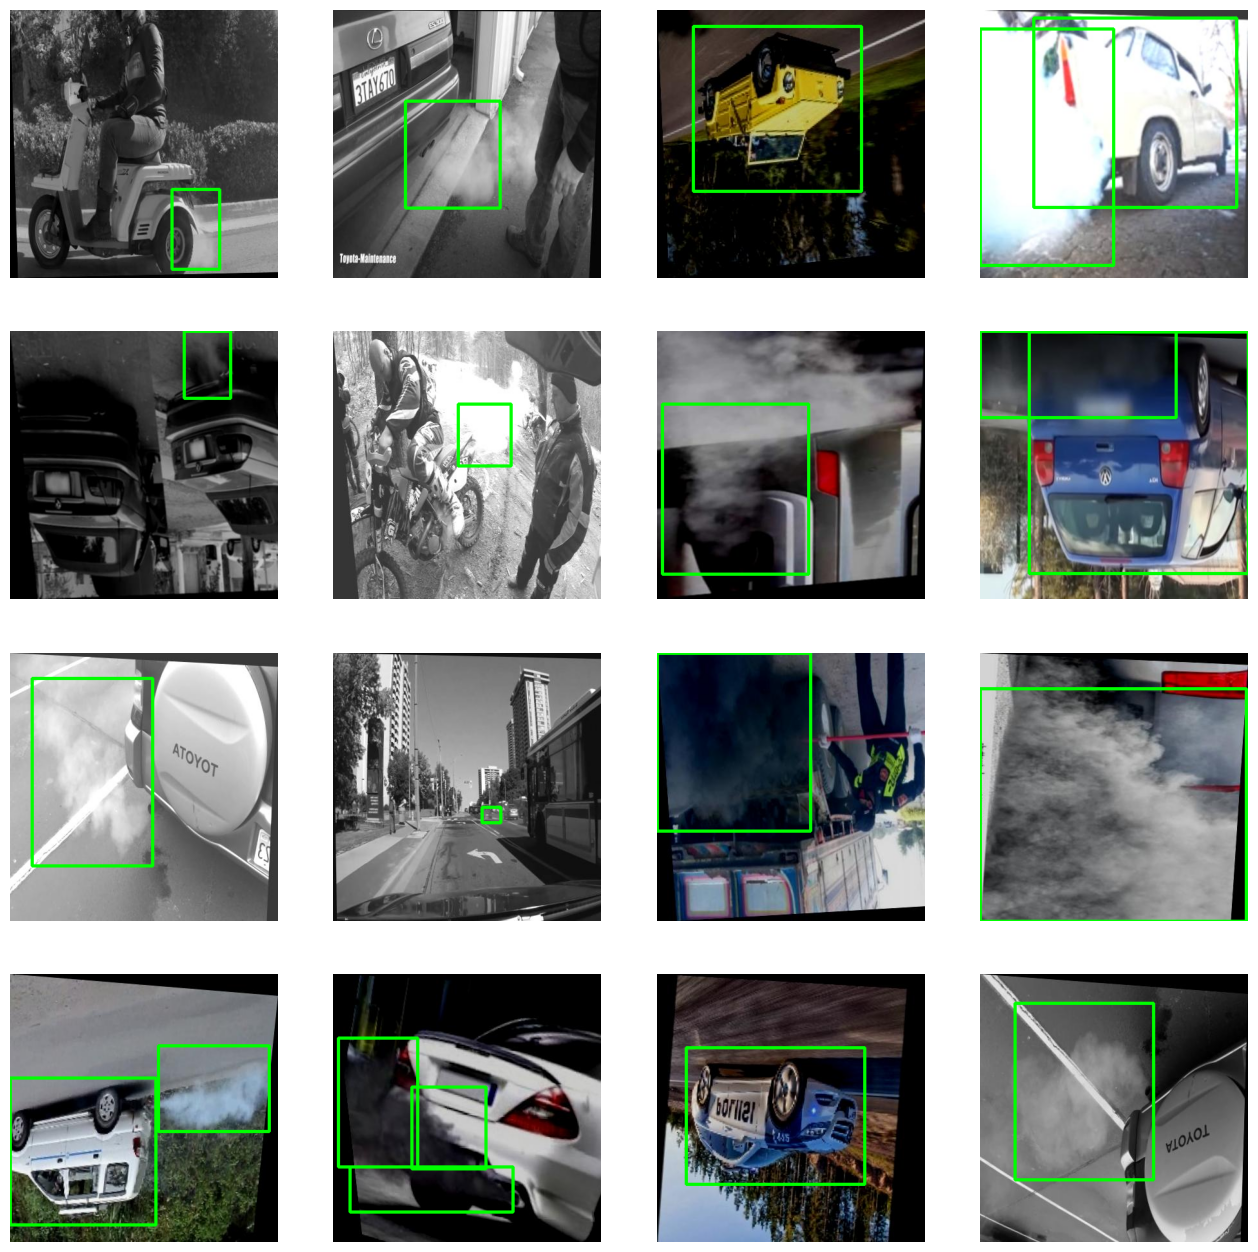

In [ ]:
# retrieves a list of all image files in the training images directory for further processing
image_files = os.listdir(train_images)

# randomly selects 16 images from the training set for visualization
# helping to inspect the dataset
random_images = random.sample(image_files, 16)

# creates a 4x4 grid of subplots to display the randomly selected images
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# loop through the randomly selected images
# calculating the row and column indices for the subplot grid
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # load each image using OpenCV
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # constructs the path to the corresponding label file, reads it, and splits the labels into a list
    # each label typically contains information about detected objects in the image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # for each label, it checks if it has the correct number of components (5).
    # if so, it extracts the class ID and bounding box parameters (center coordinates, width, height)
    # then converts them to pixel coordinates, and draws a rectangle around the detected object using OpenCV
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    # converts the image from BGR to RGB format (since OpenCV uses BGR)
    # displays it in the appropriate subplot, and turns off the axis for a cleaner look
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

# renders the plots with the images and their detected objects
plt.show()

Load a specific image, resizes it to 512x512 pixels, checks if the image was loaded successfully, and prints its dimensions

In [ ]:
# load an image using OpenCV
image = cv2.imread("/content/smoke-vehicles-5/train/images/041013autogas-1_jpg.rf.38c618ab2570a8614100e8fabff8580a.jpg")
image = cv2.resize(image, (512, 512))
if image is None:
    print(f"Failed to load image at path: {image_path}")
else:
    height, width, channels = image.shape
    print(f"The image has dimensions {width}x{height} and {channels} channels.")


The image has dimensions 512x512 and 3 channels.


Trains the YOLO model using the specified dataset configuration file (data.yaml) for 15 epochs, with images resized to 640 pixels, setting a random seed for reproducibility, a batch size of 32, and using 4 worker threads for data loading.

In [ ]:
data = {
    'test': '/content/smoke-vehicles-5/test/images',
    'train': '/content/smoke-vehicles-5/train/images',
    'val': '/content/smoke-vehicles-5/valid/images'
}

# Writing the data to a YAML file
with open('data.yaml', 'w') as file:
    yaml.dump(data, file)

print("Data has been written to 'data.yaml'")

In [ ]:
# training the model
model.train(data = '/content/smoke-vehicles-5/data.yaml',
            epochs = 15,
            imgsz = 640,
            seed = 42,
            batch = 32,
            workers = 4)

Ultralytics YOLOv8.2.94 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/smoke-vehicles-5/data.yaml, epochs=15, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 46.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/smoke-vehicles-5/train/labels... 2184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2184/2184 [00:01<00:00, 1776.53it/s]


train: New cache created: /content/smoke-vehicles-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/smoke-vehicles-5/valid/labels... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<00:00, 1053.61it/s]


val: New cache created: /content/smoke-vehicles-5/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      4.49G      1.771      2.952      2.037         20        640: 100%|██████████| 69/69 [00:44<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        204        261      0.329      0.277      0.247      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      3.96G       1.73      2.434      1.979         31        640: 100%|██████████| 69/69 [00:40<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        204        261      0.284      0.348      0.219     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      3.95G      1.706      2.247      1.948         23        640: 100%|██████████| 69/69 [00:38<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]


                   all        204        261      0.381      0.359      0.274      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      3.96G      1.726      2.161      1.941         24        640: 100%|██████████| 69/69 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        204        261      0.465      0.299      0.271      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      3.95G      1.696      2.004      1.893         23        640: 100%|██████████| 69/69 [00:39<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        204        261      0.538      0.402      0.359      0.153


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15       4.1G      1.765      1.955      2.107          8        640: 100%|██████████| 69/69 [00:43<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]


                   all        204        261      0.399      0.365      0.331      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      3.95G      1.704      1.727      2.047          9        640: 100%|██████████| 69/69 [00:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all        204        261      0.493      0.463      0.474      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      3.96G      1.654      1.645       1.97         10        640: 100%|██████████| 69/69 [00:38<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]

                   all        204        261      0.619      0.586      0.618       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      3.98G       1.59      1.513      1.916          9        640: 100%|██████████| 69/69 [00:37<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        204        261      0.654      0.556      0.595      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      3.96G      1.534      1.436       1.85          9        640: 100%|██████████| 69/69 [00:37<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        204        261      0.649      0.589      0.598      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      3.95G      1.507      1.355      1.824         10        640: 100%|██████████| 69/69 [00:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]

                   all        204        261       0.66      0.651      0.652      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      3.96G      1.432      1.251      1.749          9        640: 100%|██████████| 69/69 [00:37<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        204        261      0.684      0.514       0.63       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      3.95G      1.384      1.178      1.711         10        640: 100%|██████████| 69/69 [00:37<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        204        261      0.765      0.677      0.717       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      3.96G      1.346      1.107      1.682         12        640: 100%|██████████| 69/69 [00:37<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]

                   all        204        261      0.721      0.626      0.712      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      3.95G      1.284      1.079       1.62         10        640: 100%|██████████| 69/69 [00:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        204        261      0.768      0.644       0.72       0.39



15 epochs completed in 0.180 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.94 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


                   all        204        261       0.77      0.643      0.722      0.391
                     0        187        223      0.863      0.677      0.761      0.363
                     1         34         38      0.677      0.608      0.683      0.418
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5abbcdc940>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.save('smoke-vehicles.pt')

In [ ]:
# load cached label data from a NumPy file to ensure it is freshly accessed for further processing
data = np.load('/content/smoke-vehicles-5/train/labels.cache', allow_pickle=True).item()

# extracts the labels from the loaded data, which contain information about the images and their corresponding bounding boxes
labels = data['labels']

# iterates through each entry in the labels and appends relevant information to a list
# including image file names, shapes, classes, bounding boxes, normalization status, and bounding box format.
extracted_data = []

for entry in labels:
    extracted_data.append({
        'im_file': entry['im_file'],
        'shape': entry['shape'],
        'class': entry['cls'].flatten().tolist(),  # flattening in case there are multiple classes
        'bboxes': entry['bboxes'].tolist(),  # convert to list for easier handling
        'normalized': entry['normalized'],
        'bbox_format': entry['bbox_format']
    })

# converts the list of extracted data into a Pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(extracted_data)

# prints the first few rows of the DataFrame to check its structure and contents
print(df.head())

                                             im_file       shape  class  \
0  /content/smoke-vehicles-5/train/images/041013a...  (416, 416)  [0.0]   
1  /content/smoke-vehicles-5/train/images/041013a...  (416, 416)  [0.0]   
2  /content/smoke-vehicles-5/train/images/041013a...  (416, 416)  [0.0]   
3  /content/smoke-vehicles-5/train/images/041013a...  (416, 416)  [0.0]   
4  /content/smoke-vehicles-5/train/images/041013a...  (416, 416)  [0.0]   

                                              bboxes  normalized bbox_format  
0  [[0.3973822593688965, 0.35916033387184143, 0.5...        True        xywh  
1  [[0.5813226103782654, 0.6442008018493652, 0.48...        True        xywh  
2  [[0.47571036219596863, 0.6639876961708069, 0.4...        True        xywh  
3  [[0.42803052067756653, 0.30631449818611145, 0....        True        xywh  
4  [[0.3944605886936188, 0.34451285004615784, 0.4...        True        xywh  


In [ ]:
# load the cached label data again and checks its type and shape
# which helps verify the data structure

# Load
data = np.load('/content/smoke-vehicles-5/train/labels.cache', allow_pickle=True)

# Check
print("Type of data:", type(data))
print("Shape of data:", data.shape)

# checks if the data is a non-empty NumPy array and converts it to a DataFrame
# ensuring it can be easily manipulated

# if scalar or empty -> handle it accordingly
if isinstance(data, np.ndarray) and data.ndim > 0:
    # if its a structured array -> convert it to a DataFrame
    if data.ndim == 1:
        df = pd.DataFrame(data)
    else:
        df = pd.DataFrame(data.tolist())

    # print the shape and columns of the DataFrame, along with its contents
    # to verify its structure.
    print("DataFrame shape:", df.shape)
    print("Columns in DataFrame:", df.columns.tolist())
    print(df.head())
else:
    print("Data is not in a suitable format for DataFrame conversion.")

Type of data: <class 'numpy.ndarray'>
Shape of data: ()
Data is not in a suitable format for DataFrame conversion.


In [ ]:
# filters the DataFrame to include only images that contain class 0 (smoke)
class_0_images = df[df['class'].apply(lambda x: 0 in x)]

# filters the DataFrame to include only images that contain class 1 (car)
class_1_images = df[df['class'].apply(lambda x: 1 in x)]

In [ ]:
# saves the DataFrame to a CSV file
# excluding the index column for cleaner output
df.to_csv('labels_data.csv', index=False)

In [ ]:
# displays the columns of the DataFrame
df.columns
# prints the first few rows again to check the contents
df.head()

Index(['im_file', 'shape', 'class', 'bboxes', 'normalized', 'bbox_format'], dtype='object')

In [ ]:
# lists all files in the directory
# which can help confirm the presence of expected files
print(os.listdir('/content/smoke-vehicles-5'))

['test', 'data.yaml', 'train', 'README.dataset.txt', 'valid', 'README.roboflow.txt']


Defines a function smoke_detect that takes an image path as input, loads the image, runs the YOLO model on it to detect objects, plots the detections on the image, converts it to RGB format, and returns the processed image.

In [ ]:
def smoke_detect(img_path):

    # read the image
    img = cv2.imread(img_path)

    # pass the image through the detection model and get the result
    detect_result = model(img)

    # plot the detections
    detect_img = detect_result[0].plot()

    # Ccnvert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img

* Defines the directory containing custom validation images.
* Lists all image files in that directory.
* Randomly selects 12 images for display.
* Creates a 3x4 grid of subplots to visualize the selected images.
* Loops through the selected images, calling the smoke_detect function to perform object detection on each image.
* Displays each detected image in the corresponding subplot and turns off the axes for a cleaner look.
* Adjusts the spacing between the subplots for better visualization.


0: 640x640 2 0s, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.4ms
Speed: 2.7ms preprocess, 7.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 0s, 7.4ms
Speed: 3.3ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 7.4ms
Speed: 3.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 0s, 7.3ms
Speed: 3.5ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 2 1s, 7.2ms
Speed: 3.4ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.2ms
Speed: 3.6ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0:

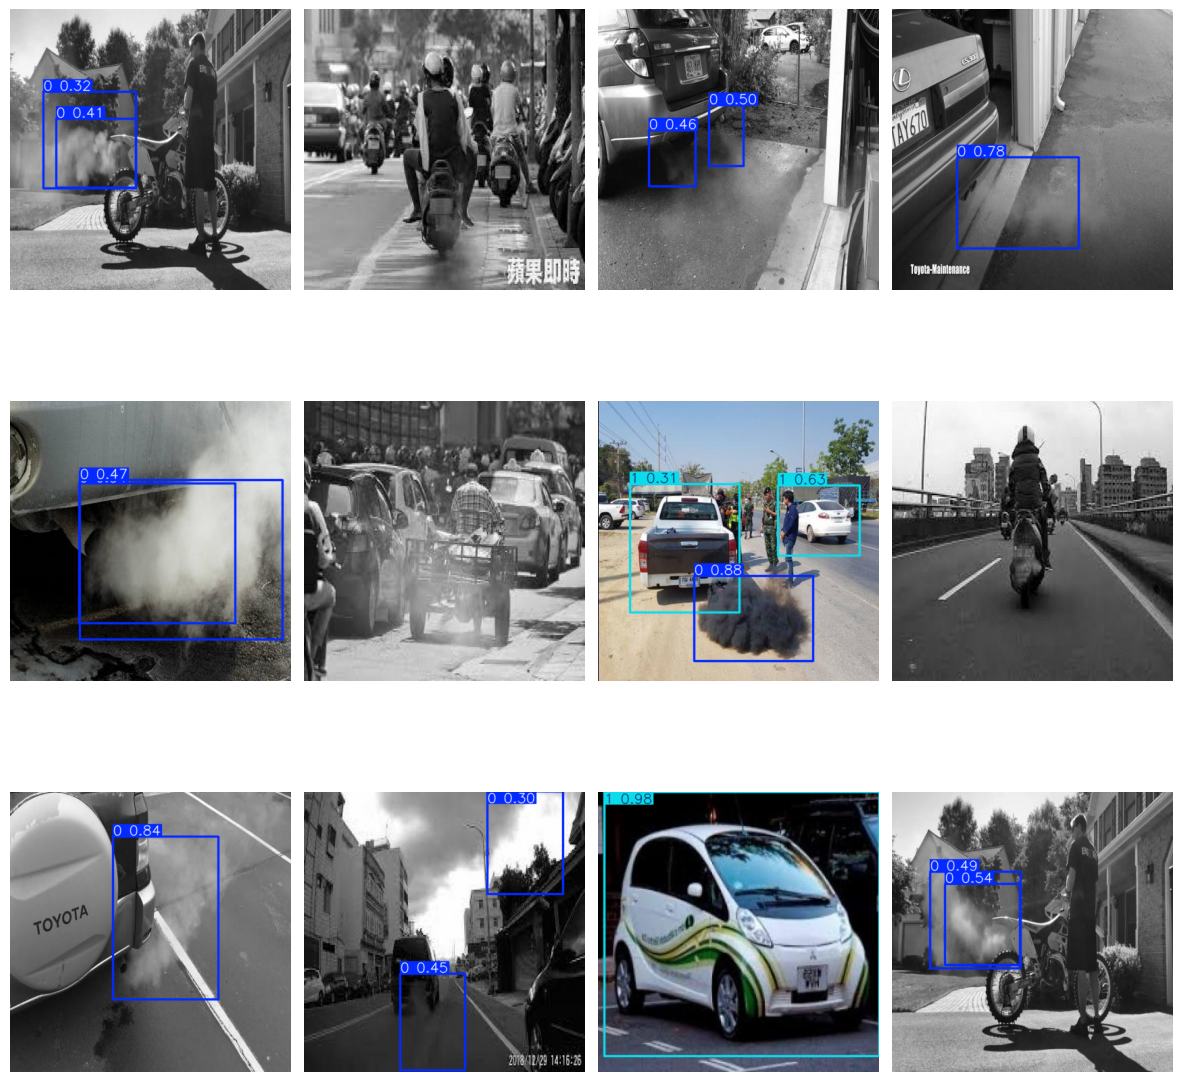

In [ ]:
# define the directory where the custom images are stored
custom_image_dir = '/content/smoke-vehicles-5/valid/images'

# get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# select 12 random images from the list
selected_images = random.sample(image_files, 12)

# create a figure with subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

# iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = smoke_detect(img_path)

     # plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)


image 1/1 /content/SmokeImage.jpeg: 384x640 1 0, 12.7ms
Speed: 2.4ms preprocess, 12.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


array([[[ 89,  89,  89],
        [ 87,  87,  87],
        [ 78,  78,  78],
        ...,
        [ 94, 128, 127],
        [118, 153, 149],
        [120, 153, 149]],

       [[ 14,  14,  14],
        [  9,   9,   9],
        [  6,   6,   6],
        ...,
        [ 67, 101, 100],
        [ 84, 118, 117],
        [ 98, 131, 127]],

       [[  7,   7,   7],
        [  3,   3,   3],
        [  0,   0,   0],
        ...,
        [123, 154, 155],
        [111, 142, 143],
        [110, 141, 140]],

       ...,

       [[ 52, 116, 116],
        [ 63, 127, 127],
        [ 26,  90,  90],
        ...,
        [ 95, 142, 170],
        [101, 150, 176],
        [106, 156, 179]],

       [[ 66, 130, 130],
        [ 69, 133, 133],
        [ 58, 122, 122],
        ...,
        [122, 166, 197],
        [117, 164, 192],
        [112, 159, 187]],

       [[ 53, 117, 117],
        [ 52, 116, 116],
        [ 74, 138, 138],
        ...,
        [129, 170, 202],
        [118, 162, 193],
        [109, 153, 182]]], dtype=uint8)
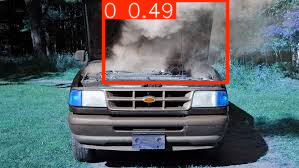

In [ ]:
# path for external photo
external_photo_path = '/content/SmokeImage.jpeg'

# load and predict
results = model(external_photo_path)

# visualize
results[0].plot()


image 1/1 /content/AccidentImage.jpeg: 480x640 1 1, 7.6ms
Speed: 2.7ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


array([[[200, 173, 146],
        [200, 173, 146],
        [199, 172, 145],
        ...,
        [235, 219,  11],
        [235, 219,  11],
        [235, 219,  11]],

       [[200, 173, 146],
        [200, 173, 146],
        [199, 172, 145],
        ...,
        [235, 219,  11],
        [235, 219,  11],
        [235, 219,  11]],

       [[200, 173, 146],
        [199, 172, 145],
        [198, 171, 144],
        ...,
        [235, 219,  11],
        [235, 219,  11],
        [235, 219,  11]],

       ...,

       [[189, 186, 201],
        [187, 184, 199],
        [185, 182, 197],
        ...,
        [176, 165, 161],
        [174, 165, 162],
        [175, 166, 163]],

       [[199, 195, 214],
        [199, 195, 214],
        [200, 196, 215],
        ...,
        [167, 156, 152],
        [198, 186, 184],
        [177, 165, 163]],

       [[199, 194, 215],
        [199, 194, 215],
        [200, 195, 216],
        ...,
        [156, 144, 142],
        [187, 175, 173],
        [166, 154, 152]]], dtype=uint8)
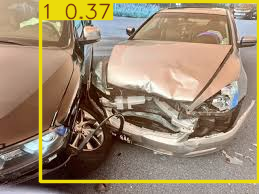

In [ ]:
# path for external photo
external_photo_path = '/content/AccidentImage.jpeg'

# load and predict
results = model(external_photo_path)

# visualize
results[0].plot()

In [ ]:
# list the contents of the directory where the model weights should be
output_dir = '/content/runs/detect/train2/weights'
print("Contents of the weights directory:", os.listdir(output_dir))

Contents of the weights directory: ['last.pt', 'best.pt']


In [ ]:
# load the best-trained YOLO model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

The main loop processes each frame of the video, detecting objects using the YOLO model and drawing bounding boxes around them. Here’s a brief overview of the steps involved:

* Read Frame: Each frame is read sequentially from the video.
* Skip Frames: Every second frame is processed to reduce computational load.
* Detection: The YOLO model detects objects in the current frame.
* Bounding Boxes: Detected objects are marked with bounding boxes and labels indicating their class and confidence scores.
* Masks Processing: If available, masks are processed for additional analysis (like fire detection).
* Output Video: The processed frames can be written to an output video file.

In [ ]:
# defines the path to the video file that will be analyzed.
video_path = '/content/SmokedVehicles.mp4'

# sets up parameters for text annotations that will be overlaid on video frames
# including font type, size, position, and colors
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
text_position = (40, 80)
font_color = (255, 255, 255)    # white color for text
background_color = (0, 0, 255)  # red background for text

# initializes a deque (double-ended queue) to keep track of the last 10 accident percentages
# which can be useful for smoothing or averaging
accident_deque = deque(maxlen=10)

# opens the video file for processing
cap = cv2.VideoCapture(video_path)

# checks if the video was opened successfully;
# if not, it prints an error message and exits the program
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# set up a video writer to save the processed video.
# define the codec for output video and retrieves the width and height of the frames from the input video
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
width = int(cap.get(3))
height = int(cap.get(4))
out = cv2.VideoWriter('smoke_vehicle_assessment.mp4', fourcc, 20.0, (width, height))

# initializes a frame counter
frame_counter = 0

# initializes an empty set for class_id
# which will be used to track unique class IDs detected in the video frames
class_id = set()

# enters a loop to process video frames until the video ends
while cap.isOpened():
    ret, frame = cap.read()  # reads a frame from the video
    if not ret:
        print("Failed to read frame")  # if reading fails, it prints an error message and exits the loop
        break

    frame_counter += 1  # increments the frame counter for each processed frame

    # skip processing for every other frame to reduce computational load
    # effectively processing every second frame
    if frame_counter % 2 != 0: # skip processing for every 2 frames
        continue  # skip to the next iteration of the loop

    # print a message indicating that a frame is being processed
    # which can help with debugging
    print("Processing frame...")

    # passes the current frame through the YOLO model to perform object detection, storing the results
    results = model(frame)

    # initializes a set to store detected vehicle IDs for the current frame
    current_class_id = set()

    # iterate through the detection results,
    # extracting bounding box coordinates, confidence scores, and class IDs for each detected object
    for result in results:
      for detection in result.boxes.data:  # Iterate through boxes
        x1, y1, x2, y2, conf, cls = detection.tolist()

        # applies a confidence threshold to filter out detections that are not sufficiently confident (below 0.7)
        # if the confidence is too low, it skips to the next detection.
        if conf < 0.7:
            continue

        # treats the class ID as a unique vehicle ID for tracking purposes
        vehicle_id = int(cls)

        # add the detected vehicle ID to the set for the current frame
        # allowing for tracking across frames
        current_class_id.add(vehicle_id)

        # draws a bounding box around the detected object on the current frame using OpenCV
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        # format the label for the detected object based on its ID and confidence score
        # preparing it for display
        if vehicle_id == 0:
            label = f"Smoke, Conf: {conf:.2f}"
        elif vehicle_id == 1:
            label = f"Car, Conf: {conf:.2f}"
        else:
            label = f"ID: {vehicle_id}, Conf: {conf:.2f}"

        # place the formatted label above the bounding box on the frame using OpenCV
        cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # update the overall set of class IDs with the IDs detected in the current frame
    # allowing for tracking across multiple frames
    class_id.update(current_class_id)

    # check if the detection results include masks (in case of segmentation tasks)
    # if masks are present, it initializes a total area counter and calculates the total area of the current frame
    # it then processes each mask to create a binary representation, where the mask is converted to a binary image
    if results and results[0].masks is not None:
        total_area = 0
        masks = results[0].masks.data.cpu().numpy()
        image_area = frame.shape[0] * frame.shape[1]
        for mask in masks:
            binary_mask = (mask > 0).astype(np.uint8) * 255   # Converts the mask into a binary format where the mask values greater than zero are set to 255 (white), and others are set to 0 (black)
            contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            if contours:  # ensure contours are found
                total_area += cv2.contourArea(contours[0])

        percentage_accident = (total_area / image_area) * 100
    else:
        percentage_accident = 0  # no masks found

    # write the processed frame to the output video
    out.write(frame)

    # showing the frame
    # cv2_imshow(frame)

    # breaking the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release() # releases the video capture object, freeing up resources
out.release() # closes the video writer object, ensuring that the output file is properly saved
cv2.destroyAllWindows() # is a cleanup function that closes all OpenCV windows

# display a message indicating completion
print("Video processing complete")

Processing frame...

0: 384x640 (no detections), 10.6ms
Speed: 2.9ms preprocess, 10.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 (no detections), 12.7ms
Speed: 2.5ms preprocess, 12.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 (no detections), 11.3ms
Speed: 2.6ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 (no detections), 11.8ms
Speed: 2.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 (no detections), 11.7ms
Speed: 2.7ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 (no detections), 9.4ms
Speed: 2.7ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 (no detections), 13.5ms
Speed: 2.5ms preprocess, 13.